# BACKGROUND

Syarah, established in 2015, is Saudi Arabia's leading online automotive marketplace, offering a comprehensive selection of new and used cars. In 2019, recognizing the growing demand for online car purchases, Syarah expanded its offerings to include used cars. The platform boasts a wide selection of over 2,300 new and used cars available for sale online.

The used car market is dynamic industry, where pricing plays a crucial role. Pricing of the vehicle correctly is crucial for both buyers and sellers, as buyers seek fair deals, while sellers want to maximize their returns. However, pricing used cars is complex, since pricing can be influenced by various factors, such as mileage, car condition, demand, etc. Around 33% of the seller's used cars in this marketplace are negotiable, making it hard for buyers to determine fair value. Region variations also determine the price fluctuation that can not be ignored by buyers and sellers. A data-driven price prediction model can help standardize pricing, improve transparency, and assist both buyers and sellers in making informed decisions.

**PROBLEM STATEMENT**

"How can we build a machine-learning model to predicts the price of a used car, ensuring better pricing strategies and maximizing profitability?"

**GOALS**

There are two main goals for the analysis to solve the problem:
- Build a machine-learning model to predict used-cars price that can potentially increase the company's revenue.
- Identify key factors that influence used-cars price.

**ANALYTIC APPROACH**

First, analyze the dataset for better data understanding. Data will be cleaned to remove anomalies/outlier handling and impute missing values. Conduct feature engineering, and then build regression model, by using various baseline model, evaluated using choosen evaluation metrics. Tune all those model, and then compare all the result to choose the best model. Following that, the best model will be improved further using feature engineering and tuning, and if the improvement deemed good enough, then that model will be choosen as the final model. The final model will be compared to rule-based pricing to determine the machine-learning model can improve the company's revenue, based on the error.

**EVALUATION METRICS**

The model will be evaluated using Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R-squared (R²) as key performance metrics.

- MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual prices, indicating the overall prediction accuracy in absolute terms (SAR). A lower MAE signifies a more precise model.
- MAPE (Mean Absolute Percentage Error): Assesses the prediction error relative to the actual price, providing a percentage-based measure of accuracy. This helps evaluate how well the model performs across different price ranges.
- R² (R-squared): Determines how well the model explains the variance in car prices. A higher R² value indicates that the model effectively captures the relationship between features and price.

These metrics together ensure a comprehensive evaluation of both absolute and relative prediction accuracy, as well as the model’s overall explanatory power.

# IMPORT LIBRARY AND DATASET

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#splitting
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer, PolynomialFeatures

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce


#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif, SelectFromModel

#preprocessing
from sklearn.compose import ColumnTransformer

#model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import accuracy_score,recall_score,precision_score, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score, f1_score,roc_auc_score,roc_curve,precision_recall_curve, classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, recall_score, f1_score

In [17]:
df=pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


**Dataset Columns Description**

1. `Type`: The model name of the car (e.g., Corolla, Yukon, Optima).
2. `Region`: The location where the car is being sold (e.g., Riyadh, Abha, Hafar Al-Batin).
3. `Make`: The brand name of the car (e.g., Toyota, GMC, Kia, Land Rover).
4. `Gear_Type`: The transmission type of the car (Manual or Automatic).
5. `Origin`: The origin of the car (e.g., Saudi, Gulf Arabic).
6. `Options`: The trim level or feature set of the car (e.g., Standard, Semi Full, Full).
7. `Year`: The year the car was manufactured.
8. `Engine_Size`: The engine capacity of the car in liters (e.g., 1.4, 2.4, 8.0).
9. `Mileage`: The distance the car has traveled in kilometers.
10. `Negotiable`: Indicates whether the price is negotiable (True for yes, False for no).
11. `Price`: The listed price of the car in Saudi riyals.

`Price` columns is the target as i want to predict price, while the other columns are the feature of the model.

# DATA UNDERSTANDING

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


The data type of the columns are correct. Negotiable column needs to be checked for business consideration. Next, check the columns data.

In [473]:
display(df.describe(), df.describe(include='object'))

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [475]:
pd.set_option('display.max_colwidth', 1000)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


For the data cleaning and preprocessings steps,
- In origin columns, other and unknown can be merged as 'other'.
- There are 0 values in price columns that needs to be imputed or dropped.
- From year columns, create new features 'age', which represents the used car's age.
- Newest car in the dataset are 2022, combined it with mileage we can get the reference date for the analysis.
- Further investigations are needed to check the numerical columns data distribution.

In [478]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

In [480]:
numerical_col = ['Year', 'Engine_Size', 'Mileage', 'Price']

Year


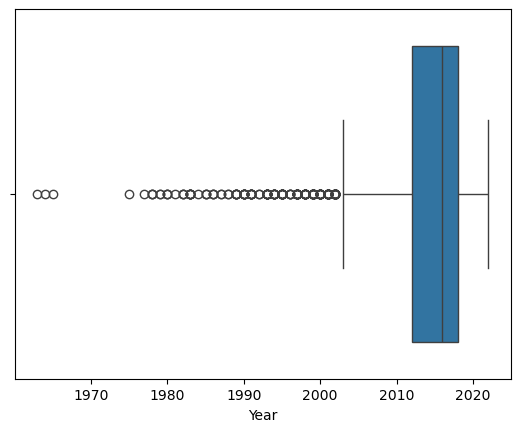

Engine_Size


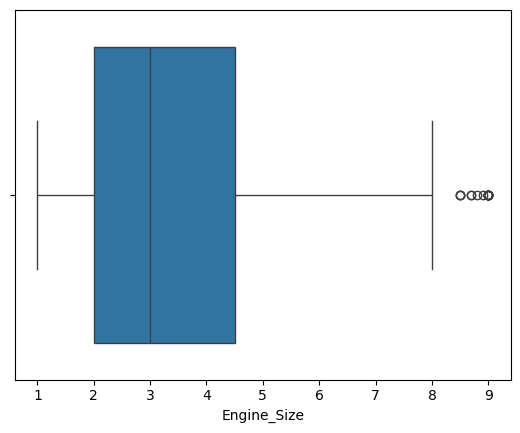

Mileage


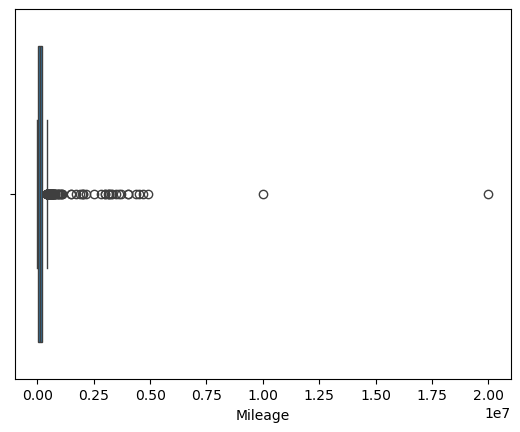

Price


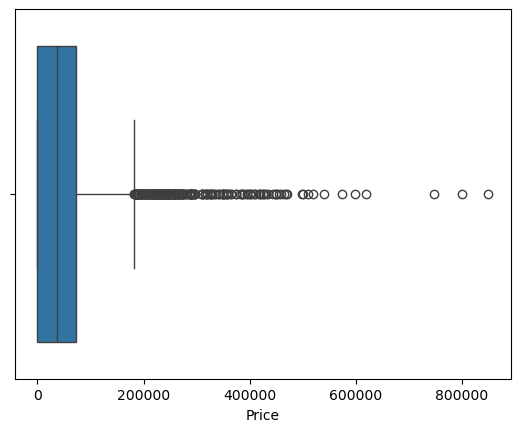

In [482]:
for i in numerical_col:
    print(i)
    sns.boxplot(data=df, x=i)
    plt.show()

Based on the boxplot, there are outliers in Engine_Size, Mileage, and Price, that needs to be handled. Extreme outliers in price will be dropped, while mileage and engine size will be removed.

In [484]:
df[df['Negotiable']==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


Every units that is negotiable has 0 price. Based on domain knowledge, this needs to be imputed, instead of dropped for better pricing accuracy and modelling.

In [506]:
df['Negotiable'].value_counts()

Negotiable
False    3828
True     1796
Name: count, dtype: int64

In [494]:
df[df.duplicated(keep=False)==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


There are missing values that needs to be handled in the data cleaning processes.

# DATA CLEANING

There are several aspects that will be addressed in the data cleaning steps, such as handling missing values, drop duplicates, outlier handling, and checking for anomalies (irrational data). First, the missing values will be imputed.

In [496]:
df_clean=df.copy()

<Axes: xlabel='Price', ylabel='Count'>

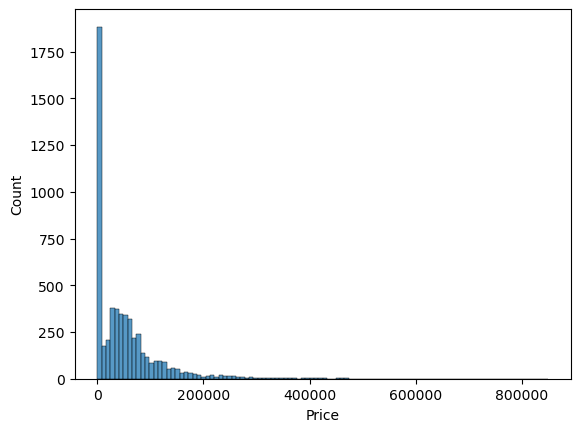

In [500]:
sns.histplot(data=df_clean, x='Price')

Since there are 32% missing values (price = 0), the data that needs to be imputed. Based on that number, missing values will be imputed using Iterative Imputer. XGBRegressor Iterative Imputer are used since there are outliers in the data.

In [502]:
from sklearn.experimental import enable_iterative_imputer  # Enable the class
from sklearn.impute import IterativeImputer

# Select relevant features for imputation
impute_features = ['Make', 'Type', 'Year', 'Engine_Size', 'Mileage', 'Price']

# Create a subset for imputation
df_impute = df_clean[impute_features].copy()

# ✅ Convert 0 values in 'Price' to NaN for proper imputation
df_impute['Price'] = df_impute['Price'].replace(0, np.nan)

# One-Hot Encoding for 'Make' and 'Type'
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')  # Drop first to avoid multicollinearity
encoded_features = encoder.fit_transform(df_impute[['Make', 'Type']]).toarray()

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Make', 'Type']))

# Drop original 'Make' and 'Type' columns
df_impute = df_impute.drop(columns=['Make', 'Type'])

# Concatenate with the one-hot encoded features
df_impute = pd.concat([df_impute.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Initialize and apply Iterative Imputer
iter_imputer = IterativeImputer(estimator=XGBRegressor(n_estimators=100, random_state=42), 
                                max_iter=5, 
                                random_state=42)
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df_impute), columns=df_impute.columns)

# Assign imputed prices back to the original dataset
df_clean['Price'] = df_imputed['Price']

# Check if missing values are filled
print("Missing values in 'Price' after imputation:", df4['Price'].isna().sum())

Missing values in 'Price' after imputation: 0


<Axes: xlabel='Price', ylabel='Count'>

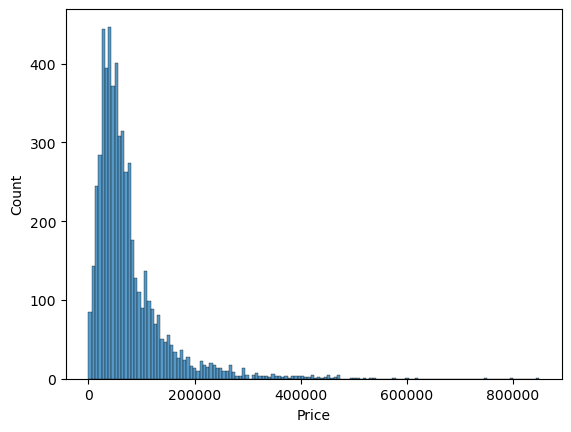

In [503]:
sns.histplot(data=df_clean, x='Price')

In [17]:
df_clean[df_clean['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [508]:
df_clean=df_clean[df_clean['Price']>=5000]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5554 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5554 non-null   object 
 1   Region       5554 non-null   object 
 2   Make         5554 non-null   object 
 3   Gear_Type    5554 non-null   object 
 4   Origin       5554 non-null   object 
 5   Options      5554 non-null   object 
 6   Year         5554 non-null   int64  
 7   Engine_Size  5554 non-null   float64
 8   Mileage      5554 non-null   int64  
 9   Negotiable   5554 non-null   bool   
 10  Price        5554 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 482.7+ KB


<Axes: xlabel='Mileage'>

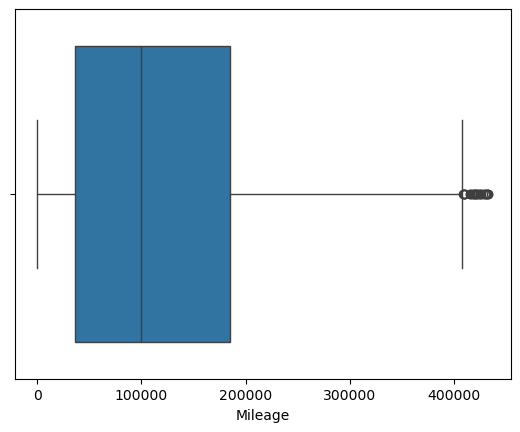

In [510]:
q3=df_clean['Mileage'].quantile(0.75)
q1=df_clean['Mileage'].quantile(0.25)
IQR=q3-q1
upper_whisker=q3+1.5*IQR
lower_whisker=q1-1.5*IQR
df_clean=df_clean[~(df_clean['Mileage']>upper_whisker)&~(df_clean['Mileage']<lower_whisker)]
sns.boxplot(x=df_clean['Mileage'])

In [512]:
# Remove incorrect data (small cars with engine size >7.5L)
df_clean = df_clean[~((df_clean['Type'].isin(['Camry', 'Carenz', 'CS35', 'Taurus', 'Dyna'])) & (df_clean['Engine_Size'] > 7.5))]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5372 non-null   object 
 1   Region       5372 non-null   object 
 2   Make         5372 non-null   object 
 3   Gear_Type    5372 non-null   object 
 4   Origin       5372 non-null   object 
 5   Options      5372 non-null   object 
 6   Year         5372 non-null   int64  
 7   Engine_Size  5372 non-null   float64
 8   Mileage      5372 non-null   int64  
 9   Negotiable   5372 non-null   bool   
 10  Price        5372 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 466.9+ KB


In [514]:
df_clean['Origin'] = df_clean['Origin'].replace('Unknown', 'Other')

In [516]:
df_clean['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other'], dtype=object)

In [518]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5372 non-null   object 
 1   Region       5372 non-null   object 
 2   Make         5372 non-null   object 
 3   Gear_Type    5372 non-null   object 
 4   Origin       5372 non-null   object 
 5   Options      5372 non-null   object 
 6   Year         5372 non-null   int64  
 7   Engine_Size  5372 non-null   float64
 8   Mileage      5372 non-null   int64  
 9   Negotiable   5372 non-null   bool   
 10  Price        5372 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 466.9+ KB


In [520]:
df_clean.drop(columns='Negotiable', inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 0 to 5623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5372 non-null   object 
 1   Region       5372 non-null   object 
 2   Make         5372 non-null   object 
 3   Gear_Type    5372 non-null   object 
 4   Origin       5372 non-null   object 
 5   Options      5372 non-null   object 
 6   Year         5372 non-null   int64  
 7   Engine_Size  5372 non-null   float64
 8   Mileage      5372 non-null   int64  
 9   Price        5372 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 461.7+ KB


In [522]:
df_clean[df_clean.duplicated(keep=False)==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910.0000
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000.0000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000.0000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000.0000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,39580.1875
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910.0000
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000.0000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,39580.1875


In [524]:
df_clean.drop_duplicates(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, 0 to 5623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5368 non-null   object 
 1   Region       5368 non-null   object 
 2   Make         5368 non-null   object 
 3   Gear_Type    5368 non-null   object 
 4   Origin       5368 non-null   object 
 5   Options      5368 non-null   object 
 6   Year         5368 non-null   int64  
 7   Engine_Size  5368 non-null   float64
 8   Mileage      5368 non-null   int64  
 9   Price        5368 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 461.3+ KB


<Axes: xlabel='Price'>

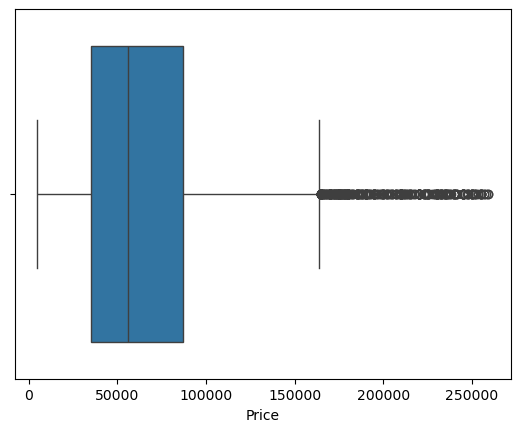

In [526]:
q3=df_clean['Price'].quantile(0.75)
q1=df_clean['Price'].quantile(0.25)
IQR=q3-q1
upper_whisker=q3+3*IQR
lower_whisker=q1-3*IQR
df_clean=df_clean[~(df_clean['Price']>upper_whisker)&~(df_clean['Price']<lower_whisker)]
sns.boxplot(x=df_clean['Price'])

In [528]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5213 entries, 0 to 5623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5213 non-null   object 
 1   Region       5213 non-null   object 
 2   Make         5213 non-null   object 
 3   Gear_Type    5213 non-null   object 
 4   Origin       5213 non-null   object 
 5   Options      5213 non-null   object 
 6   Year         5213 non-null   int64  
 7   Engine_Size  5213 non-null   float64
 8   Mileage      5213 non-null   int64  
 9   Price        5213 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 448.0+ KB


In [530]:
df=df_clean.copy()

# EDA

Year


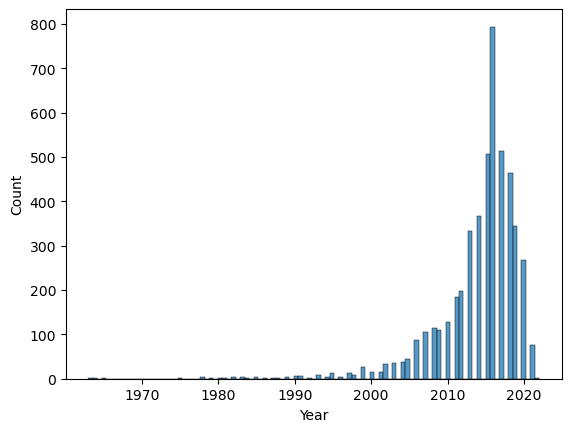

Engine_Size


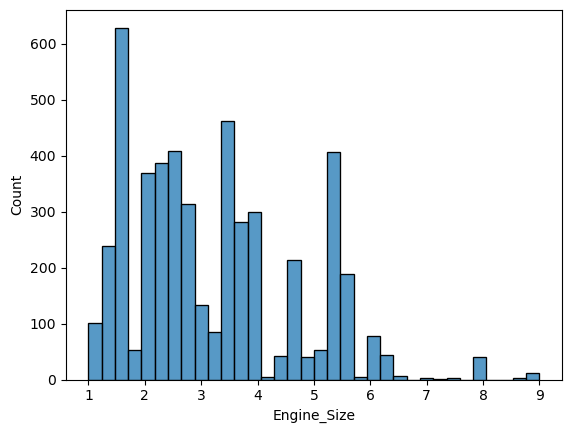

Mileage


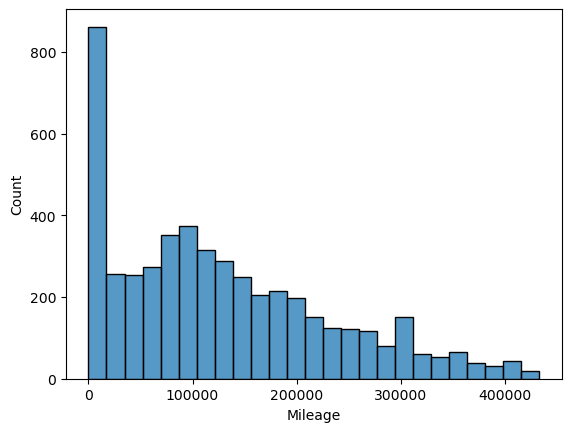

Price


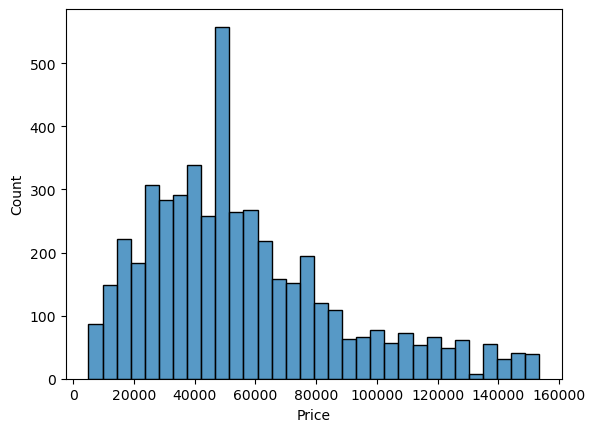

In [414]:
for i in numerical_col:
    print(i)
    sns.histplot(data=df, x=i)
    plt.show()

<Axes: xlabel='Price'>

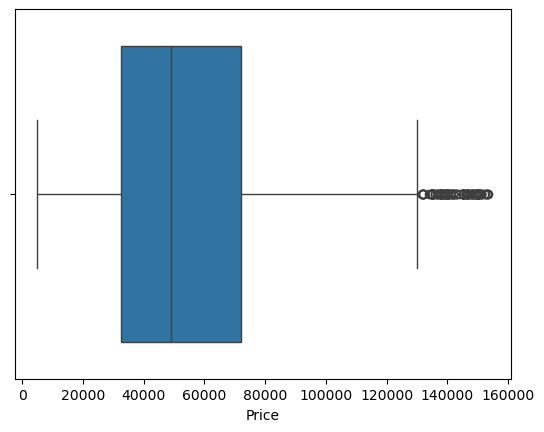

In [416]:
sns.boxplot(data=df, x='Price')

# MODELLING

The 5 baseline models (Linear Regression, KNN, Decision Tree, Random Forest, and XGBoost) will be compared to tuned model to decide best models. Best models are decided using MAE Train, MAE Test, Mape Train, Mape Test, R-squared Train and Test, and also fitting time. Difference between train and test are used to decide whether the model are stable or not.

Feature engineering : Age will be created that represents car's age. Numerical columns will be scaled using robust scaler, as there are outliers as shown in previous boxplot/histogram, while categorical columns will be encoded using one-hot encoder, as the columns good interpretation are preffered. In theory, high-cardinality feature 'Make' and 'Type' are better encoded using binary encoder (at expense of interpretability), which later will be tested

I use 2023 as the reference date, as the maximum year that this dataset have is 2022.

In [20]:
reference_date = 2023
df['Age']=reference_date-df['Year']

In [535]:
#Variabel independen/feature
X=df[['Type', 'Make', 'Region', 'Gear_Type', 'Origin', 'Options', 'Age',
         'Engine_Size', 'Mileage']]
#variabel dependen/label/flag
y=df['Price']

In [537]:
#split dataset 70:30
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [539]:
numerical_columns=['Age', 'Engine_Size', 'Mileage']
categorical_columns=['Type', 'Make', 'Region', 'Gear_Type', 'Origin', 'Options']

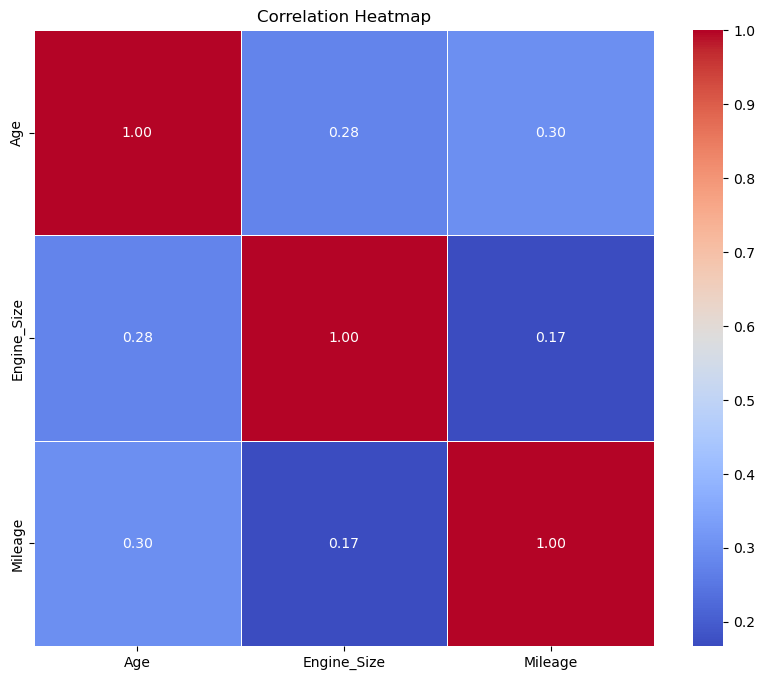

In [541]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

There are no multicollinearity in numerical features

In [543]:
from sklearn.preprocessing import PolynomialFeatures

# Update the numerical pipeline to include polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 2', 
         Pipeline([
             ('Scaler 1', RobustScaler())  # Scale the transformed features
         ]), 
         numerical_columns),
        ('Categorical1', 
         Pipeline([
             ('Encoder', OneHotEncoder(handle_unknown='ignore'))
         ]), 
         categorical_columns)
    ], 
    remainder='passthrough'
)

In [545]:
# Define models (NO HYPERPARAMETER GRIDS for baselines)
models = {
    'Baseline KNN': KNeighborsRegressor(),  # Default hyperparameters
    'Baseline Decision Tree': DecisionTreeRegressor(),  # Default hyperparameters
    'Baseline Linear Regression': LinearRegression(),  # Default hyperparameters
    'Baseline XGBoost': XGBRegressor(),  # Default hyperparameters
    'Baseline Random Forest': RandomForestRegressor(),  # Default hyperparameters
    'Tuned KNN': (KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7], 'regressor__weights': ['uniform', 'distance']}),
    'Tuned Decision Tree': (DecisionTreeRegressor(), {'regressor__max_depth': [None, 5, 10], 'regressor__min_samples_split': [2, 5, 10]}),
    'Tuned Linear Regression': (LinearRegression(), {}), # No tuning for linear regression
    'Tuned XGBoost': (XGBRegressor(), {'regressor__n_estimators': [100, 200, 300], 'regressor__learning_rate': [0.01, 0.05, 0.1], 'regressor__max_depth': [3, 4, 5]}),
    'Tuned Random Forest': (RandomForestRegressor(), {'regressor__n_estimators': [100, 200, 300], 'regressor__max_depth': [None, 5, 10]})
}


results = []

for model_name, model_or_tuple in models.items():
    print(f"Training and evaluating {model_name}...")
    start_time = time.time()

    if isinstance(model_or_tuple, tuple):  # Tuned model
        model, param_grid = model_or_tuple
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        fitting_time = time.time() - start_time

    else:  # Baseline model (no tuning)
        model = model_or_tuple  # The model itself, no tuple
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train) # Fit without any tuning
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        fitting_time = time.time() - start_time

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        'Model': model_name,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Fitting Time': fitting_time
    })

results_df = pd.DataFrame(results)
print(results_df)

Training and evaluating Baseline KNN...
Training and evaluating Baseline Decision Tree...
Training and evaluating Baseline Linear Regression...
Training and evaluating Baseline XGBoost...
Training and evaluating Baseline Random Forest...
Training and evaluating Tuned KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and evaluating Tuned Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training and evaluating Tuned Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training and evaluating Tuned XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Training and evaluating Tuned Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
                        Model     MAE Train      MAE Test  MAPE Train  \
0                Baseline KNN  12547.204157  15458.055390    0.248097   
1      Baseline Decision Tree     15.668104  13082.693457    0.000190   
2  Baseline Linear 

In [546]:
results_df.sort_values(by='MAE Test')

,Model,MAE Train,MAE Test,MAPE Train,MAPE Test,R2 Train,R2 Test,Fitting Time
8,Tuned XGBoost,7067.816270,9538.385464,0.134774,0.181332,0.954501,0.892172,5.129263
3,Baseline XGBoost,6109.714083,9670.534163,0.117498,0.187340,0.968032,0.888669,0.166059
9,Tuned Random Forest,3832.431004,10142.288153,0.068383,0.189961,0.981974,0.863864,75.760779
4,Baseline Random Forest,3834.872811,10208.521447,0.069489,0.192448,0.982272,0.864109,11.789162
6,Tuned Decision Tree,5170.399033,12203.091971,0.086177,0.224486,0.965101,0.808130,0.688356
1,Baseline Decision Tree,15.668104,13082.693457,0.000190,0.237023,0.999963,0.752098,0.224584
5,Tuned KNN,15.668104,15143.903406,0.000190,0.323535,0.999963,0.749315,7.399707
0,Baseline KNN,12547.204157,15458.055390,0.248097,0.325300,0.849254,0.743309,0.790505
2,Baseline Linear Regression,15022.891197,17029.903974,0.330120,0.418012,0.764921,0.704461,0.099757
7,Tuned Linear Regression,15022.891197,17029.903974,0.330120,0.418012,0.764921,0.704461,0.200546


Tuned XGBoost are chosen as the best model. Define the best models once again to get the best_model and its parameter,

In [560]:
# Define models
xgb = XGBRegressor()

# Define hyperparameter grid
param_grid = [
    {
        'regressor': [xgb],
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 4, 5]
    }
]

# Create pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb)  # Placeholder, replaced during tuning
])


# Define GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model with hyperparameter tuning
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

fitting_time = end_time - start_time

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Best Model: {best_model}')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'MAE Train: {mae_train}')
print(f'MAE Test: {mae_test}')
print(f'MAPE Train : {mape_train}')
print(f'MAPE Test : {mape_test}')
print(f'R2 Train : {r2_train}')
print(f'R2 Test : {r2_test}')
print(f'Fitting Time: {fitting_time:.2f} seconds')

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 2',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   RobustScaler())]),
                                                  ['Age', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical1',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Make', 'Region',
                                                   'Gear_Type', 'Origin',
                                                   'Options'])])),
                ('regressor',
                 XGBRegres

**FEATURE IMPORTANCE & SHAP-VALUE**

In [563]:
# Get feature importances from the best XGBoost model
importances = best_model.named_steps['regressor'].feature_importances_

# Get feature names after preprocessing
encoded_feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
feature_importance_df.head(20)

,Feature,Importance
241,Categorical1__Type_Range Rover,0.088441
355,Categorical1__Make_Mercedes,0.081390
349,Categorical1__Make_Lexus,0.064356
182,Categorical1__Type_Land Cruiser,0.061290
341,Categorical1__Make_Hyundai,0.045843
1,Numerical 2__Engine_Size,0.039038
319,Categorical1__Make_BMW,0.029543
180,Categorical1__Type_LX,0.025127
348,Categorical1__Make_Land Rover,0.023032
401,Categorical1__Options_Full,0.022337


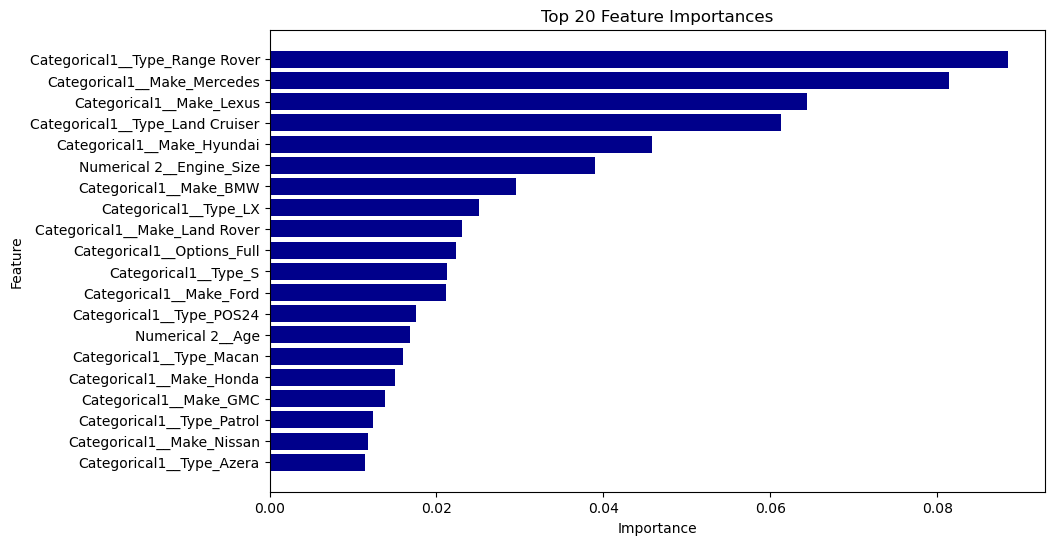

In [565]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='darkblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

In [567]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 2',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   RobustScaler())]),
                                                  ['Age', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical1',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Make', 'Region',
                                                   'Gear_Type', 'Origin',
                                                   'Options'])])),
                ('regressor',
                 XGBRegressor...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

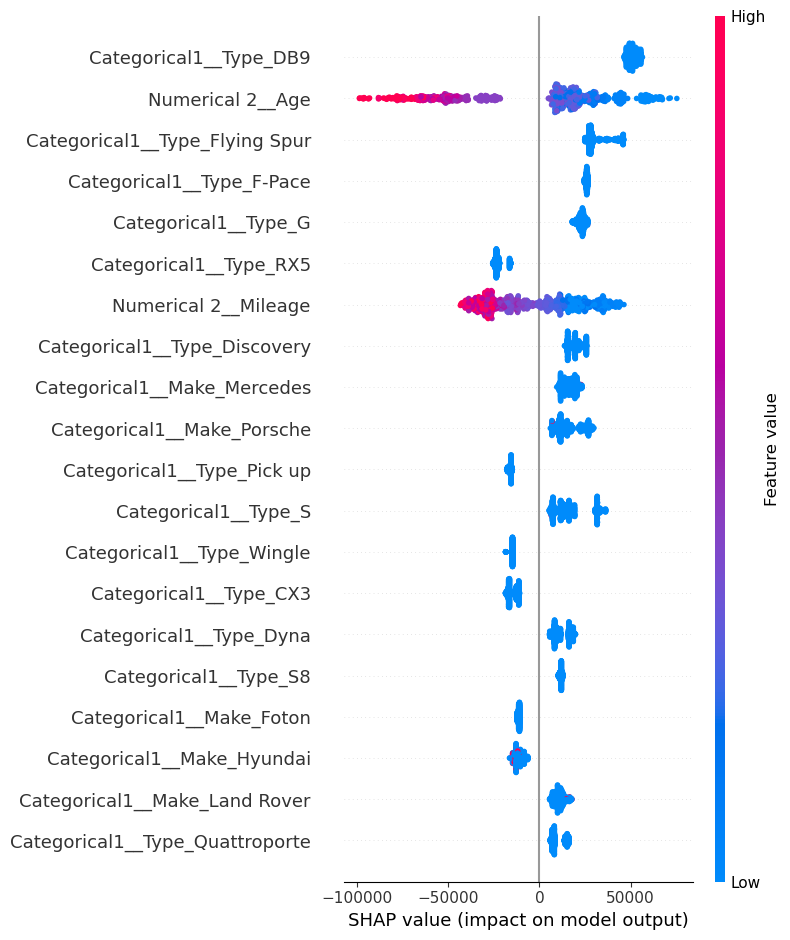

In [568]:
import shap
import matplotlib.pyplot as plt
import scipy.sparse

# 1. Apply Preprocessing Pipeline to Data and Get Feature Names AFTER Transformation:
if hasattr(best_model, 'named_steps'):  # Check if best_model is a pipeline
    if 'preprocessor' in best_model.named_steps:  # Check if named_steps has preprocessor
        preprocessor = best_model.named_steps['preprocessor']
        X_train_transformed = preprocessor.transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)

        # Get feature names AFTER transformation:
        if hasattr(preprocessor, 'get_feature_names_out'):
            feature_names = preprocessor.get_feature_names_out()
        else:  # Handle cases where get_feature_names_out is not available
            feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
    else:  # If there is no preprocessor, the best_model is the model itself
        X_train_transformed = X_train
        X_test_transformed = X_test
        feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
elif isinstance(best_model, Pipeline):  # Check if best_model is a pipeline
    preprocessor = best_model.steps[0][1]  # Access the preprocessor
    X_train_transformed = preprocessor.transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # Get feature names AFTER transformation:
    if hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    else:  # Handle cases where get_feature_names_out is not available
        feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
else:  # If there is no preprocessor, the best_model is the model itself
    X_train_transformed = X_train
    X_test_transformed = X_test
    feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

# 2. Convert to Dense for SHAP (if needed - only once):
X_train_dense = X_train_transformed.toarray() if isinstance(X_train_transformed, scipy.sparse.csr_matrix) else X_train_transformed
X_test_dense = X_test_transformed.toarray() if isinstance(X_test_transformed, scipy.sparse.csr_matrix) else X_test_transformed

# 3. Extract the Tree-based Model from the Pipeline (if needed):
if isinstance(best_model, Pipeline):
    tree_model = best_model.steps[-1][1]  # Get final estimator
else:
    tree_model = best_model

# 4. SHAP Value Calculation and Plotting:
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer(X_test_dense)  # Corrected way to compute SHAP values

# 5. Plot SHAP summary:
shap.summary_plot(shap_values.values, X_test_dense, feature_names=feature_names)
plt.show()


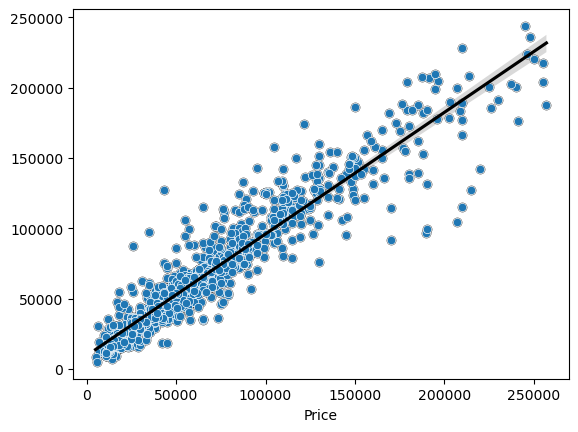

In [571]:
sns.regplot(x=y_test,y=y_pred_test,color='black')
sns.scatterplot(x=y_test, y=y_pred_test)
plt.show()

# MODEL-IMPROVEMENT

The chosen tuned XGBoost will be improved by achieving 2 aspects :
- Reduce the difference between MAE Test and Train, since the model were slightly overfitted.
- Reduce the MAE test as low as possible.

The improvement will try to met those 2 aspects, while also met one of the evaluation metric :The MAPE test of the model must not be lower than 20%, based on the paper that i found (Kumar, S., & Sinha, A. (2024). Predicting used car prices with regression techniques. International Journal of Computer Trends and Technology, 72(6), 132–141.). To address overfitting, i will use feature selection to reduce the number of feature used by models, and use regularization parameter in XGBoost (alpha and lambda). 

Feature engineering will be used to reduce the mae test. Based on feature importance, 'Luxury_SUV' and 'Luxury_Brand' will be created using 'make' and 'type' feature. 'Metro_Region' will also be created using 'Region' feature, that imply units in metro cities. Using domain knowledge/paper, 'Origin' feature will be encoded using Ordinal Encoder, as research found that cars imported from gulf-arabic states are less preferred by customer, since those cars different specifications that cars commonly used in Saudi Arabia. (Al-Turki, M. & Alshahrani, A. (2020). Market Differences in Saudi vs. Gulf Imported Vehicles.)

In [602]:
df2 = df_clean.copy()

reference_date = 2023
df2['Age']=reference_date-df2['Year']

luxury_brands = ['Mercedes', 'Lexus', 'Porsche', 'Land Rover', 'Bentley']
df2['Luxury_Brand'] = df2['Make'].apply(lambda x: 1 if x in luxury_brands else 0)

luxury_suvs = ['Range Rover', 'Land Cruiser', 'RX5']
df2['Luxury_SUV'] = df2['Type'].apply(lambda x: 1 if x in luxury_suvs else 0)

metro_cities = ['Riyadh', 'Jeddah', 'Dammam']
df2['Metro_Region'] = df2['Region'].apply(lambda x: 1 if x in metro_cities else 0)

In [604]:
#Variabel independen/feature
X=df2[['Age', 'Type', 'Make', 'Options', 'Region', 'Gear_Type', 'Origin', 
         'Engine_Size', 'Mileage', 'Luxury_Brand', 'Luxury_SUV', 'Metro_Region']]
#variabel dependen/label/flag
y=df2['Price']

In [606]:
#split dataset 70:30
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [608]:
numerical_columns=['Age', 'Engine_Size', 'Mileage']
categorical_columns=['Type', 'Make', 'Options', 'Region', 'Gear_Type']
new_columns=['Luxury_Brand', 'Luxury_SUV', 'Metro_Region']

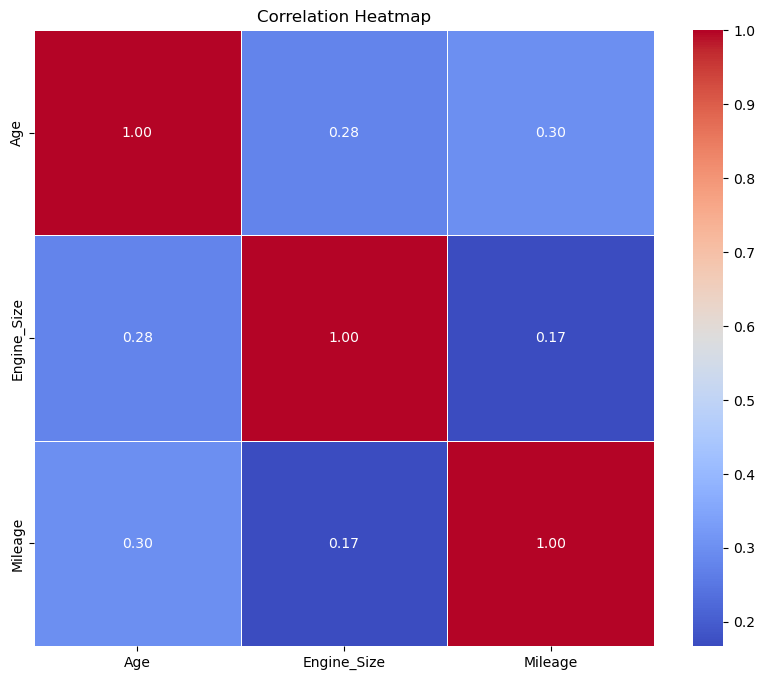

In [610]:
# Compute the correlation matrix
corr_matrix = df2[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [612]:
from sklearn.preprocessing import PolynomialFeatures
origin_categories = [['Gulf Arabic', 'Saudi', 'Other']]
# Update the numerical pipeline to include polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', 
         Pipeline([
             ('Scaler 1', RobustScaler())  # Scale the transformed features
         ]), 
         numerical_columns),
        ('Categorical 1', 
         Pipeline([
             ('Encoder', OneHotEncoder(handle_unknown='ignore'))
         ]), 
         categorical_columns),
        ('Categorical 2', 
         Pipeline([
             ('Encoder 2', OrdinalEncoder(categories=origin_categories))
         ]), 
         ['Origin'])
    ], 
    remainder='passthrough'
)

In [614]:
from sklearn.feature_selection import SelectFromModel
# Define models
xgb = XGBRegressor()

# Define hyperparameter grid
param_grid = [
    {
        'regressor': [xgb],
        'feature_selection__k': [300,350,400],
        'regressor__n_estimators': [250],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__reg_alpha': [1],  # L1 regularization
        'regressor__reg_lambda': [1],
        'regressor__max_depth': [4]
    }
]

# Create pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection',SelectKBest(score_func=f_classif)),
    ('regressor', xgb)  # Placeholder, replaced during tuning
])


# Define GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model with hyperparameter tuning
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

fitting_time = end_time - start_time

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Best Model: {best_model}')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'MAE Train: {mae_train}')
print(f'MAE Test: {mae_test}')
print(f'MAPE Train : {mape_train}')
print(f'MAPE Test : {mape_test}')
print(f'R2 Train : {r2_train}')
print(f'R2 Test : {r2_test}')
print(f'Fitting Time: {fitting_time:.2f} seconds')

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   RobustScaler())]),
                                                  ['Age', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical 1',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Make', 'Options',
                                                   'Region', 'Gear_Type']),
                                                 ('Categorical 2',
                                                  Pi

The evaluation metrics shows that the model are more stable or good fit, since the difference between MAE Test and MAE Train are lower than model before improvement (from 2471 to 1722), while also maintained good MAPE Test (19%, still lower than 20%). Based on this, i decided to choose this model as my final model.

**FEATURE IMPORTANCE & SHAP-VALUE**

In [617]:
# Get selected feature indices from SelectKBest
selected_feature_indices = best_model.named_steps['feature_selection'].get_support(indices=True)

# Get feature names after preprocessing
all_feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Extract only selected feature names
selected_feature_names = [all_feature_names[i] for i in selected_feature_indices]

# Get feature importances from the best XGBoost model
importances = best_model.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
feature_importance_df.head(20)

,Feature,Importance
397,remainder__Luxury_Brand,0.201702
398,remainder__Luxury_SUV,0.086274
1,Numerical 1__Engine_Size,0.061729
180,Categorical 1__Type_Land Cruiser,0.055623
326,Categorical 1__Make_Ford,0.036154
336,Categorical 1__Make_Hyundai,0.035800
314,Categorical 1__Make_BMW,0.034042
0,Numerical 1__Age,0.029252
364,Categorical 1__Options_Full,0.028733
36,Categorical 1__Type_Azera,0.019448


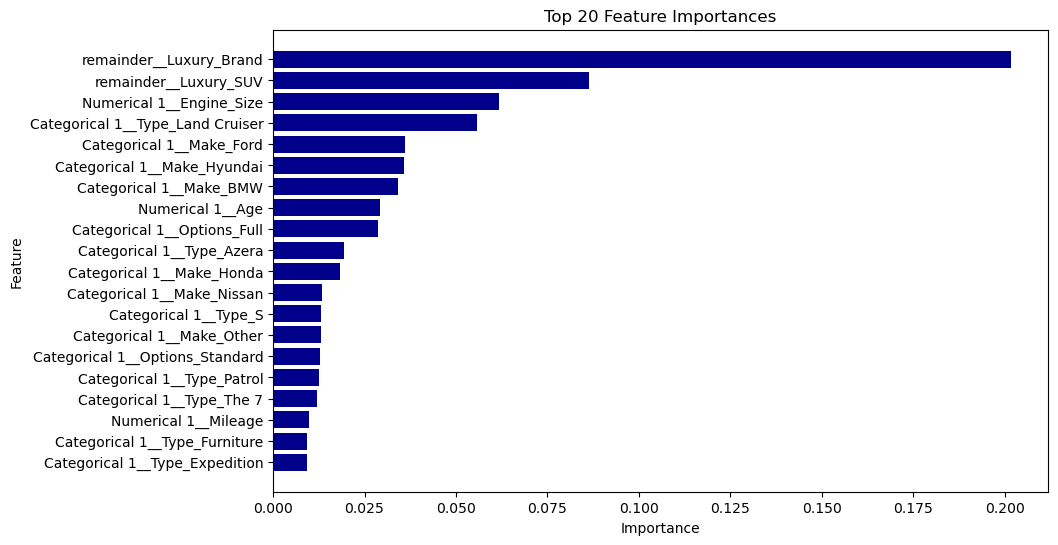

In [619]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='darkblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

Based on the feature importance, the new feature 'Luxury_SUV' and 'Luxury_Brand' are two of the most important feature that influence the model. These two engineered feature clearly improving the model, that needs to be incorporated to the model.

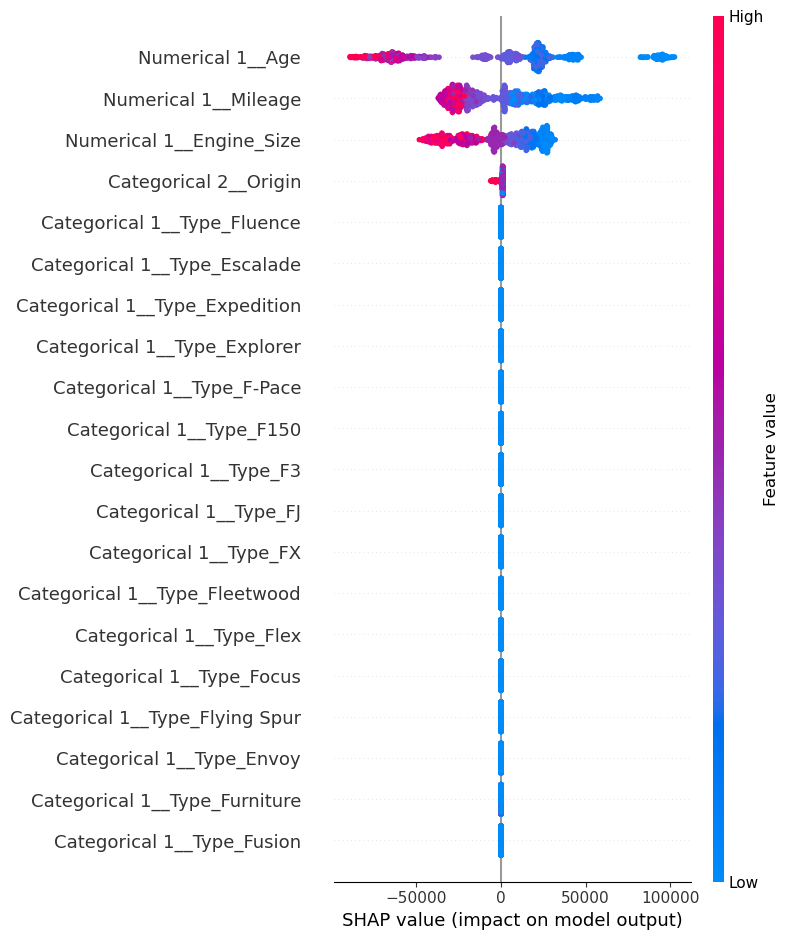

In [623]:
import shap
import scipy.sparse
import matplotlib.pyplot as plt

# 1. Apply Preprocessing Pipeline and Get Feature Names AFTER Transformation:
if hasattr(best_model, 'named_steps'):  # Check if best_model is a pipeline
    if 'preprocessor' in best_model.named_steps:  # Check if named_steps has preprocessor
        preprocessor = best_model.named_steps['preprocessor']
        X_train_transformed = preprocessor.transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)

        # Get feature names AFTER transformation:
        if hasattr(preprocessor, 'get_feature_names_out'):
            feature_names = preprocessor.get_feature_names_out()
        else:  # Handle cases where get_feature_names_out is not available
            feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
    else:  # If no preprocessor, use original data
        X_train_transformed, X_test_transformed = X_train, X_test
        feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]
else:
    X_train_transformed, X_test_transformed = X_train, X_test
    feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

# 2. Apply Feature Selection (SelectKBest)
if 'feature_selection' in best_model.named_steps:
    selector = best_model.named_steps['feature_selection']
    
    # Get selected feature indices
    selected_feature_indices = selector.get_support(indices=True)
    
    # Extract feature names for selected features only
    selected_feature_names = [feature_names[i] for i in selected_feature_indices]

    # Transform the dataset
    X_train_selected = selector.transform(X_train_transformed)
    X_test_selected = selector.transform(X_test_transformed)
else:
    X_train_selected, X_test_selected = X_train_transformed, X_test_transformed
    selected_feature_names = feature_names  # Keep all feature names if no selection

# 3. Convert Sparse to Dense (if needed)
X_train_dense = X_train_selected.toarray() if isinstance(X_train_selected, scipy.sparse.csr_matrix) else X_train_selected
X_test_dense = X_test_selected.toarray() if isinstance(X_test_selected, scipy.sparse.csr_matrix) else X_test_selected

# 4. Extract the Final Tree-Based Model
tree_model = best_model.named_steps['regressor'] if 'regressor' in best_model.named_steps else best_model

# 5. SHAP Value Calculation and Plotting
explainer = shap.Explainer(tree_model, X_train_dense)  # Modern SHAP explainer
shap_values = explainer(X_test_dense)  # Compute SHAP values

# 6. Plot SHAP Summary
shap.summary_plot(shap_values.values, X_test_dense, feature_names=selected_feature_names)
plt.show()


Based on the SHAP Values, age are the most important factors that influence the pricing, followed by mileage and engine size. The ordinal-encoded origin shows that gulf-imported cars has slightly lower price than non gulf-imported cars, aligned with the paper that i found.

**BINARY ENCODER TESTING**

In this part i show the modeling using binary encoded of 'Make' and 'Type', as they have high cardinality (high unique values). The results shown that binary encoded model performed worse than one-hot encoded model. Since one-hot encoded are also better for model interpretability, i choose one-hot encoder for those 2 columns

In [89]:
#Variabel independen/feature
X=df2[['Type', 'Make', 'Region', 'Gear_Type', 'Origin', 'Options', 'Age',
         'Engine_Size', 'Mileage']]
#variabel dependen/label/flag
y=df2['Price']

In [91]:
#split dataset 70:30
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
numerical_columns=['Age', 'Engine_Size', 'Mileage']
categorical_columns=['Region', 'Gear_Type', 'Origin', 'Options']

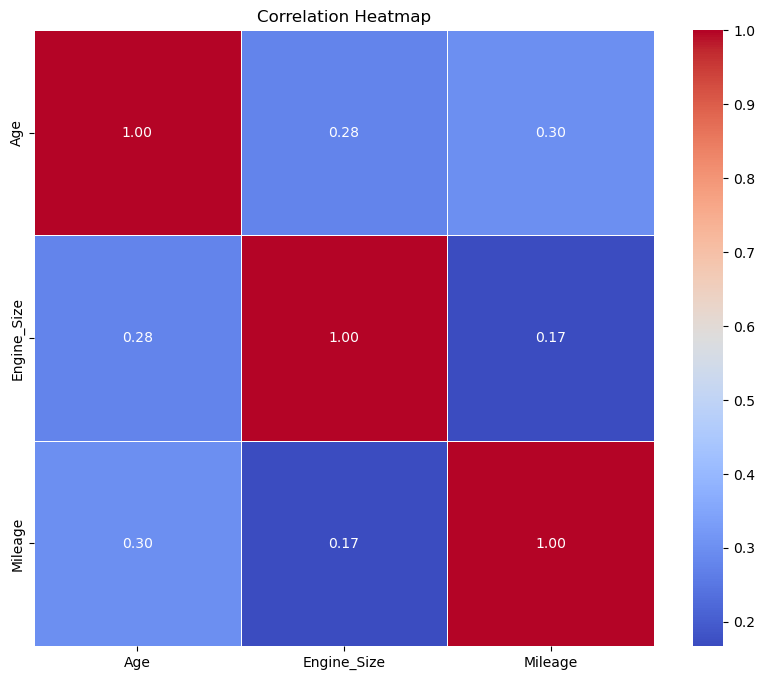

In [95]:
# Compute the correlation matrix
corr_matrix = df2[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [97]:
from category_encoders import BinaryEncoder

# Update the numerical pipeline to include polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 2', 
         Pipeline([
             ('Scaler 1', RobustScaler())  # Scale the transformed features
         ]), 
         numerical_columns),
        ('Categorical1', 
         Pipeline([
             ('Encoder', OneHotEncoder(handle_unknown='ignore'))
         ]), 
         categorical_columns),
        ('Categorical', 
         Pipeline([
             ('Encoder', BinaryEncoder())  # Use Binary Encoder for categorical features
         ]),
        ['Make', 'Type'])
    ], 
    remainder='passthrough'
)

In [99]:
# Define models (NO HYPERPARAMETER GRIDS for baselines)
models = {
    'Baseline KNN': KNeighborsRegressor(),  # Default hyperparameters
    'Baseline Decision Tree': DecisionTreeRegressor(),  # Default hyperparameters
    'Baseline Linear Regression': LinearRegression(),  # Default hyperparameters
    'Baseline XGBoost': XGBRegressor(),  # Default hyperparameters
    'Baseline Random Forest': RandomForestRegressor(),  # Default hyperparameters
    'Tuned KNN': (KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7], 'regressor__weights': ['uniform', 'distance']}),
    'Tuned Decision Tree': (DecisionTreeRegressor(), {'regressor__max_depth': [None, 5, 10], 'regressor__min_samples_split': [2, 5, 10]}),
    'Tuned Linear Regression': (LinearRegression(), {}), # No tuning for linear regression
    'Tuned XGBoost': (XGBRegressor(), {'regressor__n_estimators': [100, 300], 'regressor__learning_rate': [0.01, 0.1], 'regressor__max_depth': [3, 5]}),
    'Tuned Random Forest': (RandomForestRegressor(), {'regressor__n_estimators': [100, 300], 'regressor__max_depth': [None, 5, 10]})
}


results = []

for model_name, model_or_tuple in models.items():
    print(f"Training and evaluating {model_name}...")
    start_time = time.time()

    if isinstance(model_or_tuple, tuple):  # Tuned model
        model, param_grid = model_or_tuple
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        fitting_time = time.time() - start_time

    else:  # Baseline model (no tuning)
        model = model_or_tuple  # The model itself, no tuple
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train) # Fit without any tuning
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        fitting_time = time.time() - start_time

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        'Model': model_name,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Fitting Time': fitting_time
    })

results_df = pd.DataFrame(results)
print(results_df)

Training and evaluating Baseline KNN...
Training and evaluating Baseline Decision Tree...
Training and evaluating Baseline Linear Regression...
Training and evaluating Baseline XGBoost...
Training and evaluating Baseline Random Forest...
Training and evaluating Tuned KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training and evaluating Tuned Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training and evaluating Tuned Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training and evaluating Tuned XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training and evaluating Tuned Random Forest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
                        Model     MAE Train      MAE Test  MAPE Train  \
0                Baseline KNN  13060.499148  16578.982106    0.261075   
1      Baseline Decision Tree     15.668104  15750.905710    0.000190   
2  Baseline Linear Re

In [100]:
results_df

,Model,MAE Train,MAE Test,MAPE Train,MAPE Test,R2 Train,R2 Test,Fitting Time
0,Baseline KNN,13060.499148,16578.982106,0.261075,0.337317,0.835148,0.707583,0.467773
1,Baseline Decision Tree,15.668104,15750.905710,0.000190,0.293442,0.999963,0.646421,0.113681
2,Baseline Linear Regression,23780.392819,24832.017953,0.489569,0.570136,0.522313,0.475590,0.092965
3,Baseline XGBoost,5073.505787,12099.599727,0.091237,0.240711,0.977021,0.821915,0.186085
4,Baseline Random Forest,4711.747966,12447.395853,0.089217,0.247655,0.974442,0.798836,2.245679
5,Tuned KNN,15.668339,15694.919208,0.000190,0.319791,0.999963,0.722001,1.190715
6,Tuned Decision Tree,7066.116728,15239.644634,0.120720,0.282680,0.933400,0.685067,0.540633
7,Tuned Linear Regression,23780.392819,24832.017953,0.489569,0.570136,0.522313,0.475590,0.152367
8,Tuned XGBoost,6675.205825,11678.555198,0.119451,0.222233,0.959416,0.832351,1.569274
9,Tuned Random Forest,4630.003366,12427.661808,0.088157,0.246726,0.975741,0.800253,16.422599


# RULE-BASED VS ML MODEL

To analyze business implication of the machine learning model, the price predictions needs to be compared with pricing using rule-based. Using domain knowledge, for this analysis, units rule-based price are calculated using the average price of the same cars ('Make' and 'Type'), combined with depreciation rate of car age and mileage. There are several research/paper that shows,
- Studies have shown that cars lose around 15-25% of their value per year in their first five years, after which the depreciation rate slows.
- Typically, industry estimates that every 20,000 km driven reduces the value by 5-10%.

To incorporate these factors, i will use binning for mileage and age. Age will be binned into 3 categories: <1 years, 2-5 years, and >5 years. Mileage will be binned into 2 categories: cars with less than 32000 KM mileage, and cars with more than 32000 KM mileage. Cars with same 'Make', 'Type', 'Mileage Bin', and 'Age Bin' will have their price averaged, as representation of their rule-based pricing.

In [651]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

# Define Mileage Bins: Below 32K vs. Above 32K
df2['Mileage_Bin'] = pd.cut(df2['Mileage'], bins=[0, 32000, np.inf], labels=['<32K', '>32K'])

# Define Age Bins: <1, 2-5, >5
df2['Age_Bin'] = pd.cut(df2['Age'], bins=[0, 1, 5, np.inf], labels=['<1', '2-5', '>5'])

# Compute the median price based on Type, Make, Age Bin, and Mileage Bin
df2['Rule_Based_Price'] = df2.groupby(['Type', 'Make', 'Age_Bin', 'Mileage_Bin'])['Price'].transform('mean')

# If some values are missing (due to no exact match), use the broader Type + Make median
df2['Rule_Based_Price'].fillna(df2.groupby(['Type', 'Make'])['Price'].transform('mean'), inplace=True)

# Compute MAE for Rule-Based Model
mae_rule_based = mean_absolute_error(df2['Price'], df2['Rule_Based_Price'])

# Print results
print(f"MAE (Rule-Based Model using Type + Make + Age + Mileage): {mae_rule_based:.2f}")

MAE (Rule-Based Model using Type + Make + Age + Mileage): 17110.80


Since machine learning MAE are lower than rule-based (MAE ML model = 10142), using machine learning model are better than using rule-based. On average, by using machine learning, the company will have 6968 SAR less error price for the used cars. If the company sell all the units,

6968 SAR/unit x 5213 unit = 36324184 SAR

The company potentially will have 36324184 SAR more revenue than using Machine-Learning model. Based on this, machine learning model are more lucrative than using rule-based, and using machine learning model to predict used

# MODEL LIMITATION

There are several limitations that needs to be considered when using this model to predict used car prices. This model are valid for predict used car prices if,
- Engine Size ranged from 1 L to 9 L.
- Car Mileage from 100 KM to 433000 KM.
- Manual or Automatic transmission type.
- Car sold in Saudi Arabia.
- Car manufactured between 1963 - 2022.

Also, the used car prices are valid between 5000 to 259203 SAR. Plus, only cars type listed in the dataset are valid for the predictions. If the model are used to predict prices outside of the model limitations, the prices prediction might be incorrect and not reliable. Rule-based might be better to predict prices in that case.

In [658]:
df2.describe()

,Year,Engine_Size,Mileage,Price,Age,Luxury_Brand,Luxury_SUV,Metro_Region,Rule_Based_Price
count,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000,5213.000000
mean,2014.212162,3.253808,124033.663725,69111.036286,8.787838,0.084404,0.052561,0.703817,69111.036286
std,5.499483,1.491153,103114.349483,48108.703270,5.499483,0.278020,0.223177,0.456616,40207.948089
min,1963.000000,1.000000,100.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,6018.106445
25%,2013.000000,2.000000,39720.000000,35000.000000,5.000000,0.000000,0.000000,0.000000,42000.000000
50%,2016.000000,3.000000,103000.000000,56000.000000,7.000000,0.000000,0.000000,1.000000,58767.981021
75%,2018.000000,4.000000,189000.000000,86900.000000,10.000000,0.000000,0.000000,1.000000,83665.320549
max,2022.000000,9.000000,433000.000000,259203.093750,60.000000,1.000000,1.000000,1.000000,251599.125000


# CONCLUSION

Based on the modelling processes,
- Machine Learning model to predict used car price are created using tuned XGBoost model, that can potentially increase company's revenue by 36324184 SAR.
- The age of the car and Mileage of the car are the most important variable to predict used car's pricing.

# RECOMMENDATION

**BUSINESS RECOMMENDATION**

Based on the SHAP-value, there are several business recommendation that can be implemented,
- Adjust pricing dynamically based on age & mileage bands to align with depreciation trends.
- Introduce time-sensitive discounts for older/higher-mileage vehicles to ensure they don’t sit in inventory too long.
- Emphasize low-mileage vehicles in advertisements, as mileage has a strong negative impact on price.
- Prioritize on units that are not gulf-arabic imported, as they have slightly higher price that could leads to better revenue.

**MODEL RECOMMENDATION**

Based on the feature importance, there are several aspects that could improve the model performance,
- Analyze why luxury suv and luxury brand has high feature importance.
- Using domain knowledge, try to incorporate regional pricing effect.
- Adjust the model by demand data in the saudi arabia. High demand cars might leads to higher pricing.

# FIT FINAL MODEL & SAVING

In [627]:
#Concat train and test features data
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

,Age,Type,Make,Options,Region,Gear_Type,Origin,Engine_Size,Mileage,Luxury_Brand,Luxury_SUV,Metro_Region
2323,11,Accent,Hyundai,Standard,Najran,Automatic,Saudi,1.4,360000,0,0,0
985,6,Camry,Toyota,Standard,Riyadh,Automatic,Gulf Arabic,2.5,82000,0,0,1
2674,9,QX,INFINITI,Full,Jeddah,Automatic,Saudi,3.7,32000,0,0,1
50,3,Malibu,Chevrolet,Standard,Abha,Automatic,Saudi,1.5,62000,0,0,0
1852,16,Suburban,Chevrolet,Full,Al-Ahsa,Automatic,Saudi,5.3,226853,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1991,6,Tucson,Hyundai,Full,Hafar Al-Batin,Automatic,Other,5.3,65000,0,0,0
2914,4,Sunny,Nissan,Standard,Riyadh,Automatic,Gulf Arabic,1.5,92300,0,0,1
895,6,Innova,Toyota,Full,Jeddah,Automatic,Saudi,2.7,58000,0,0,1
2019,12,Flex,Ford,Standard,Dammam,Automatic,Other,9.0,300000,0,0,1


In [629]:
#Concat train and test label data
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

2323     15574.439453
985      66891.125000
2674     65000.000000
50       57000.000000
1852     31710.378906
            ...      
1991    119982.476562
2914     29000.000000
895      72207.085938
2019     26555.210938
189     107000.000000
Name: Price, Length: 5213, dtype: float64

In [631]:
#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
best_model.fit(data_final_model_X,data_final_model_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Scaler 1',
                                                                   RobustScaler())]),
                                                  ['Age', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical 1',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Make', 'Options',
                                                   'Region', 'Gear_Type']),
                                                 ('Categorical 2',
                                                  Pipeline(steps=[('Enc...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=250, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [633]:
import pickle

In [639]:
#Saving models

filename = 'Model Final.sav'

# Uncomment code dibawah untuk saving file model

pickle.dump(best_model,open(filename,'wb'))

In [647]:
data_final_model_X.describe()

pd.set_option('display.max_colwidth', None)


columns = data_final_model_X.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = data_final_model_X[i].unique()
    nunique = data_final_model_X[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,Type,"[Accent, Camry, QX, Malibu, Suburban, Innova, Marquis, Accord, 500, Explorer, Datsun, Sentra, Maxima, Hilux, Civic, FJ, Patrol, LX, SL, Sierra, Impala, Expedition, H6, Avalon, Seltos, POS24, Land Cruiser, Range Rover, Pajero, Tahoe, S, Sunny, Yaris, Other, Sportage, Land Cruiser 70, Coupe, Rio, Corolla, Elantra, Furniture, Caprice, Spark, 6, Yukon, Carnival, H1, CS95, E, Pathfinder, Taurus, CX9, Prado, The 3, Flex, Cressida, Senta fe, Seven, F150, Touareg, Vego, Pilot, C300, Cores, The 7, Grand Cherokee, Beetle, Victoria, Optima, A3, ES, Symbol, Hiace, Attrage, Azera, Copper, RX, Fluence, CX7, X, Charger, The 5, Land Cruiser Pickup, 301, Durango, Tucson, Navara, Kona, EC7, GLE, Armada, Mustang, Edge, Sonata, H3, Cherokee, Passat, D-MAX, Cerato, Echo, ...]",336
1,Make,"[Hyundai, Toyota, INFINITI, Chevrolet, Ford, Honda, Fiat, Nissan, Lexus, Mercedes, GMC, HAVAL, Kia, Land Rover, Mitsubishi, Mazda, Changan, BMW, Other, Volkswagen, Chrysler, Jeep, Audi, Renault, MINI, Dodge, Peugeot, Geely, Hummer, Isuzu, Genesis, Maserati, Cadillac, Bentley, GAC, Jaguar, Porsche, Škoda, Suzuki, MG, Chery, Daihatsu, Lincoln, Mercury, Great Wall, FAW, BYD, Tata, Aston Martin, Iveco, Foton, Zhengzhou, Classic, SsangYong, Victory Auto, Lifan]",56
2,Options,"[Standard, Full, Semi Full]",3
3,Region,"[Najran, Riyadh, Jeddah, Abha, Al-Ahsa, Al-Medina, Dammam, Hail, Tabouk, Qassim, Khobar, Aseer, Makkah, Taef, Al-Jouf, Hafar Al-Batin, Jazan, Al-Baha, Jubail, Arar, Yanbu, Al-Namas, Wadi Dawasir, Sakaka, Qurayyat, Besha, Sabya]",27
4,Gear_Type,"[Automatic, Manual]",2
5,Origin,"[Saudi, Gulf Arabic, Other]",3


In [649]:
import pandas as pd

# Ensure all text is fully displayed
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  # Show all rows

# Select only categorical columns
columns = data_final_model_X.select_dtypes(exclude='number').columns
values = []
nunique_list = []

for col in columns:
    unique_values = data_final_model_X[col].unique()  # Get all unique values
    nunique_count = data_final_model_X[col].nunique()  # Count unique values
    nunique_list.append(nunique_count)
    
    # Convert array to list to avoid truncation in display
    values.append(", ".join(map(str, unique_values)))  

# Create DataFrame for display
df_unique_values = pd.DataFrame({
    "Column": columns,
    "Unique Values": values,
    "Unique Count": nunique_list
})

# Display all rows without truncation
display(df_unique_values)

# Reset options after display
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

,Column,Unique Values,Unique Count
0,Type,"Accent, Camry, QX, Malibu, Suburban, Innova, Marquis, Accord, 500, Explorer, Datsun, Sentra, Maxima, Hilux, Civic, FJ, Patrol, LX, SL, Sierra, Impala, Expedition, H6, Avalon, Seltos, POS24, Land Cruiser, Range Rover, Pajero, Tahoe, S, Sunny, Yaris, Other, Sportage, Land Cruiser 70, Coupe, Rio, Corolla, Elantra, Furniture, Caprice, Spark, 6, Yukon, Carnival, H1, CS95, E, Pathfinder, Taurus, CX9, Prado, The 3, Flex, Cressida, Senta fe, Seven, F150, Touareg, Vego, Pilot, C300, Cores, The 7, Grand Cherokee, Beetle, Victoria, Optima, A3, ES, Symbol, Hiace, Attrage, Azera, Copper, RX, Fluence, CX7, X, Charger, The 5, Land Cruiser Pickup, 301, Durango, Tucson, Navara, Kona, EC7, GLE, Armada, Mustang, Edge, Sonata, H3, Cherokee, Passat, D-MAX, Cerato, Echo, 2, Camaro, Altima, Odyssey, i40, Van, LS, Cadenza, Colorado, Duster, H2, Eado, CX5, Countryman, Challenger, Aurion, Platinum, Fusion, GS, ML, 300, Crown, S300, Carens, Cruze, Nitro, Dokker, C, Quattroporte, G, Megane, Rush, A, Lancer, GL, Echo Sport, CT-S, Q5, Escalade, Compass, Kaptiva, Silverado, Blazer, Avanza, Flying Spur, Bus Urvan, Prius, Creta, G80, Dyna, VTC, CS35, Traverse, CLA, Rav4, CX3, Coupe S, GS3, Opirus, 3, Wrangler, IS, Envoy, CLS, FX, Bronco, SLK, Ciocca, SEL, KICKS, Sorento, GX, XJ, The 4, X-Trail, Royal, Cayenne, Superb, UX, F-Pace, Jimny, Safrane, Grand Vitara, Abeka, Q, RX5, Tiggo, Logan, Z, Gran Max, H100, Previa, Veloster, MKZ, BT-50, 360, CS75, MKX, Koleos, ZS, APV, A8, Grand Marquis, Power, Acadia, Cayenne S, Bora, Safari, A6, Montero, Macan, L200, GLC, Panamera, ATS, Delta, RC, Emgrand, Genesis, 5008, Discovery, Optra, The M, Ranger, Capture, S8, CT4, Prestige, Coaster, Mohave, Defender, Focus, A7, XT5, Bus County, X40, Z350, Q7, New Yorker, City, Boxer, Cayenne Turbo S, Tuscani, MKS, The 6, Terrain, HRV, Picanto, Aveo, Ram, Juke, Lumina, H9, F3, 3008, Azkarra, CT6, Town Car, X7, GC7, XF, CS85, Corolla Cross, A4, 5, Doblo, Soul, Carenz, Cayenne Turbo, Sylvian Bus, V7, Wingle, D'max, RX8, Nexon, Navigator, CRV, DB9, Daily, Montero2, Mini Van, Nativa, 4Runner, Ertiga, ASX, NX, Milan, A5, DTS, Liberty, Pick up, Stinger, Prestige Plus, ِACTIS V80, SRT, CS35 Plus, Fleetwood, Golf, CT5, Viano, Avalanche, EC8, S5, SRX, Sedona, CC, Suvana, B50, L300, Tiguan, Dzire, Jetta, C200, Cayman, K5, HS, Centennial, Thunderbird, Avante, M, Murano, Z370, Cadillac, G70, Koranado, Pegas, Vitara, Van R, LF X60, Dakota, X-Terra, Savana, F Type, CL, Coolray, Terios",336
1,Make,"Hyundai, Toyota, INFINITI, Chevrolet, Ford, Honda, Fiat, Nissan, Lexus, Mercedes, GMC, HAVAL, Kia, Land Rover, Mitsubishi, Mazda, Changan, BMW, Other, Volkswagen, Chrysler, Jeep, Audi, Renault, MINI, Dodge, Peugeot, Geely, Hummer, Isuzu, Genesis, Maserati, Cadillac, Bentley, GAC, Jaguar, Porsche, Škoda, Suzuki, MG, Chery, Daihatsu, Lincoln, Mercury, Great Wall, FAW, BYD, Tata, Aston Martin, Iveco, Foton, Zhengzhou, Classic, SsangYong, Victory Auto, Lifan",56
2,Options,"Standard, Full, Semi Full",3
3,Region,"Najran, Riyadh, Jeddah, Abha, Al-Ahsa, Al-Medina, Dammam, Hail, Tabouk, Qassim, Khobar, Aseer, Makkah, Taef, Al-Jouf, Hafar Al-Batin, Jazan, Al-Baha, Jubail, Arar, Yanbu, Al-Namas, Wadi Dawasir, Sakaka, Qurayyat, Besha, Sabya",27
4,Gear_Type,"Automatic, Manual",2
5,Origin,"Saudi, Gulf Arabic, Other",3
